In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of fake people to generate
n = 10000

# Generate fake data
data = pd.DataFrame({
    'on_time_payment_pct': np.random.uniform(50, 100, n),  # 50% to 100%
    'credit_utilization_pct': np.random.uniform(0, 100, n),  # 0% to 100%
    'credit_age_months': np.random.randint(6, 240, n),  # 6 months to 20 years
    'num_active_accounts': np.random.randint(1, 10, n),  # 1 to 10 accounts
    'recent_inquiries': np.random.randint(0, 6, n),  # 0 to 5 inquiries
    'income_stability': np.random.choice(['Stable', 'Unstable'], n, p=[0.7, 0.3]),
    'rent_on_time': np.random.choice(['Yes', 'No'], n, p=[0.8, 0.2]),
    'savings_rate_pct': np.random.uniform(0, 20, n),  # 0% to 20%
    'employment_years': np.random.uniform(0, 30, n),  # 0 to 30 years
})

# Create synthetic credit score (simplified formula)
data['credit_score'] = (
    data['on_time_payment_pct'] * 0.4
    - data['credit_utilization_pct'] * 0.3
    + data['credit_age_months'] * 0.1
    - data['recent_inquiries'] * 5
    + np.where(data['income_stability'] == 'Stable', 20, -20)
    + np.where(data['rent_on_time'] == 'Yes', 10, -10)
    + data['savings_rate_pct'] * 2
    + data['employment_years'] * 1.5
)

# Clip scores to realistic range 300–850
data['credit_score'] = np.clip(data['credit_score'], 300, 850)

# Save to CSV
data.to_csv('synthetic_credit_data.csv', index=False)

print('✅ Synthetic credit data generated and saved to synthetic_credit_data.csv')


✅ Synthetic credit data generated and saved to synthetic_credit_data.csv


In [ ]:
import pandas as pd

# Load data
data = pd.read_csv('synthetic_credit_data.csv')

# Convert categorical variables
data['income_stability'] = data['income_stability'].map({'Stable': 1, 'Unstable': 0})
data['rent_on_time'] = data['rent_on_time'].map({'Yes': 1, 'No': 0})

# Split into features (X) and target (y)
X = data.drop(columns=['credit_score'])
y = data['credit_score']


In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost regressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Check accuracy
score = model.score(X_test, y_test)
print(f'✅ Model R² accuracy on test set: {score:.2f}')


✅ Model R² accuracy on test set: 1.00



Predicted Credit Score: 300


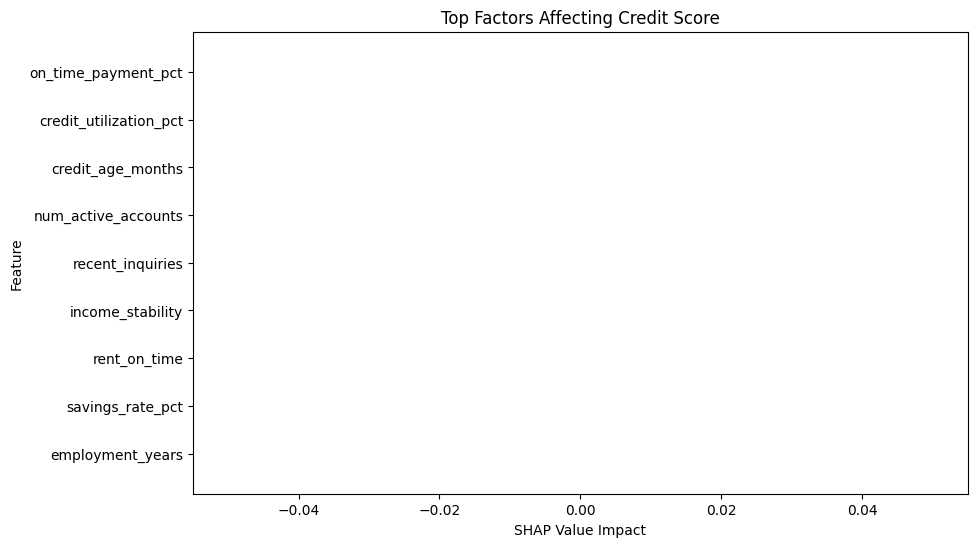


💬 Improvement Advice:
- Increase your on-time payment percentage.


In [ ]:
import shap
import numpy as np

# Explain model
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Pick one example person from test set
person_idx = 0
person_data = X_test.iloc[person_idx:person_idx+1]
predicted_score = model.predict(person_data)[0]

print(f"\nPredicted Credit Score: {predicted_score:.0f}")

# Show feature importance for that person
shap.initjs()
import matplotlib.pyplot as plt
shap_values_df = pd.DataFrame({
    'feature': X_test.columns,
    'shap_value': shap_values[person_idx].values
}).sort_values(by='shap_value', key=abs, ascending=False)

# Plot as horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(shap_values_df['feature'], shap_values_df['shap_value'])
plt.xlabel('SHAP Value Impact')
plt.ylabel('Feature')
plt.title('Top Factors Affecting Credit Score')
plt.gca().invert_yaxis()
plt.show()


# Give basic advice
def give_advice(person):
    advice = []
    if person['on_time_payment_pct'].values[0] < 90:
        advice.append("Increase your on-time payment percentage.")
    if person['credit_utilization_pct'].values[0] > 30:
        advice.append("Reduce your credit utilization below 30%.")
    if person['recent_inquiries'].values[0] > 2:
        advice.append("Avoid applying for new credit too often.")
    if person['savings_rate_pct'].values[0] < 5:
        advice.append("Try to save at least 5% of your income.")
    if person['income_stability'].values[0] == 0:
        advice.append("Stabilize your income if possible.")
    if person['rent_on_time'].values[0] == 0:
        advice.append("Pay your rent on time.")
    if person['employment_years'].values[0] < 2:
        advice.append("Stay in your current job longer if possible.")
    return advice

advice_list = give_advice(person_data)
print("\n💬 Improvement Advice:")
for tip in advice_list:
    print("- " + tip)



In [ ]:
# Define score ranges
if predicted_score >= 750:
    category = "Excellent"
    benefits = [
        "Lower interest rates on loans and credit cards",
        "Higher chance of loan approval",
        "Better insurance rates",
        "Higher credit limits"
    ]
elif predicted_score >= 650:
    category = "Good"
    benefits = [
        "Reasonable loan terms",
        "Good chance of approval",
        "Moderate credit limits"
    ]
else:
    category = "Poor"
    drawbacks = [
        "High interest rates",
        "Loan application rejections",
        "Low credit limits",
        "Difficulty getting approved for rentals or utilities"
    ]

# Print summary
print(f"\n📊 Credit Score Category: {category}")

if category in ["Excellent", "Good"]:
    print("✅ Benefits of your score:")
    for b in benefits:
        print(f"- {b}")
else:
    print("⚠ Drawbacks of your score:")
    for d in drawbacks:
        print(f"- {d}")



📊 Credit Score Category: Poor
⚠ Drawbacks of your score:
- High interest rates
- Loan application rejections
- Low credit limits
- Difficulty getting approved for rentals or utilities


In [ ]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate artificial data
data = pd.DataFrame({
    'payment_history': np.random.randint(50, 100, size=n_samples),      # % on-time payments
    'credit_utilization': np.random.randint(10, 90, size=n_samples),    # % of credit used
    'income': np.random.randint(20000, 150000, size=n_samples),         # annual income
    'loan_count': np.random.randint(1, 10, size=n_samples),             # number of loans
    'credit_age': np.random.randint(1, 25, size=n_samples),             # years of credit history
    'debt_to_income': np.random.uniform(0.1, 0.9, size=n_samples),      # debt-to-income ratio
})

# Create synthetic credit score (simple formula)
data['credit_score'] = (
    data['payment_history'] * 0.35
    + (100 - data['credit_utilization']) * 0.3
    + (data['income'] / 150000) * 100 * 0.15
    + data['credit_age'] * 2
    - data['loan_count'] * 5
    - data['debt_to_income'] * 100 * 0.2
).clip(300, 850)  # Clamp between 300–850

# Round score
data['credit_score'] = data['credit_score'].round()

# Preview
print(data.head())


   payment_history  credit_utilization  income  loan_count  credit_age  \
0               88                  42  146365           9           2   
1               78                  62   75409           6          23   
2               64                  31   48625           1           8   
3               92                  30  101040           1          16   
4               57                  79   44089           6          22   

   debt_to_income  credit_score  
0        0.582432         300.0  
1        0.595193         300.0  
2        0.852619         300.0  
3        0.720729         300.0  
4        0.202350         300.0  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split features and target
X = data.drop('credit_score', axis=1)
y = data['credit_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForest
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"✅ Model trained successfully!")
print(f"📊 Mean Squared Error: {mse:.2f}")
print(f"📈 R^2 Score: {r2:.2f}")


✅ Model trained successfully!
📊 Mean Squared Error: 0.00
📈 R^2 Score: 1.00


<ipython-input-8-6537622bf6ba>:7: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


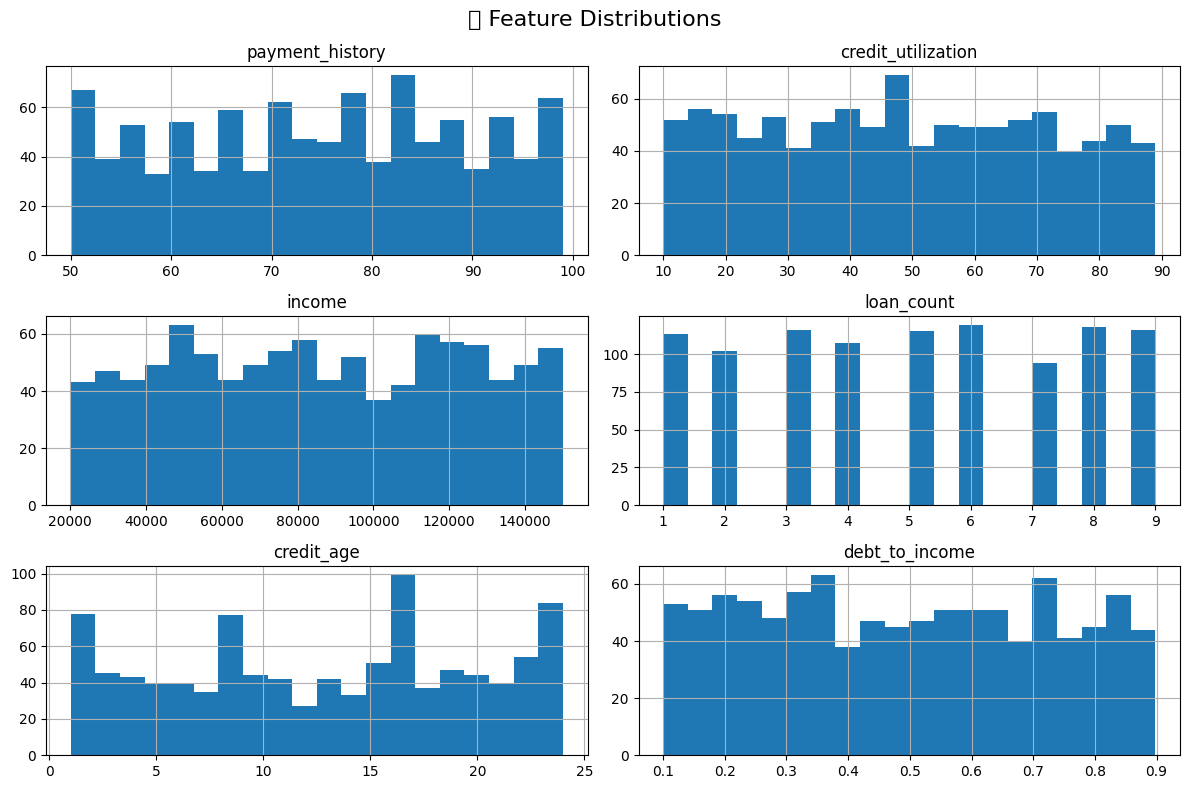

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


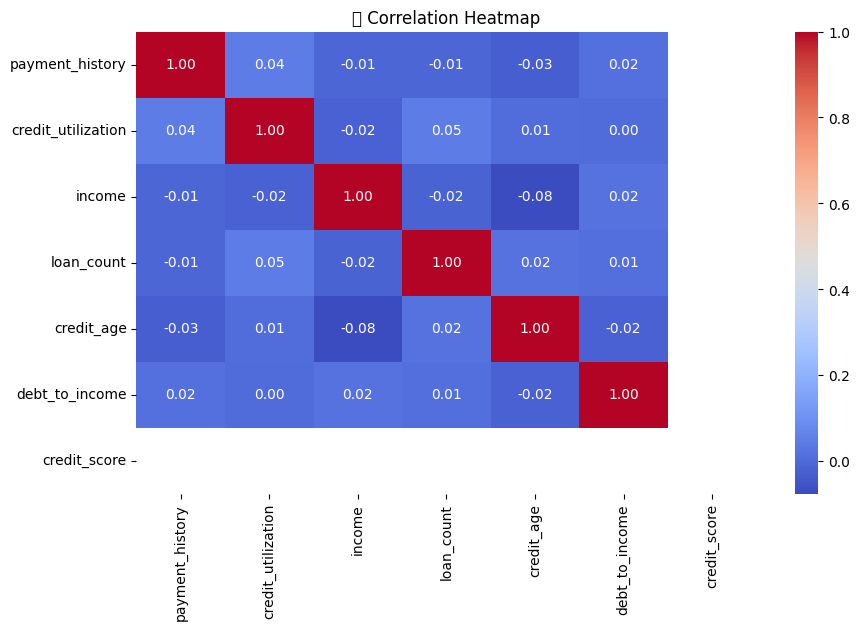

<ipython-input-8-6537622bf6ba>:24: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


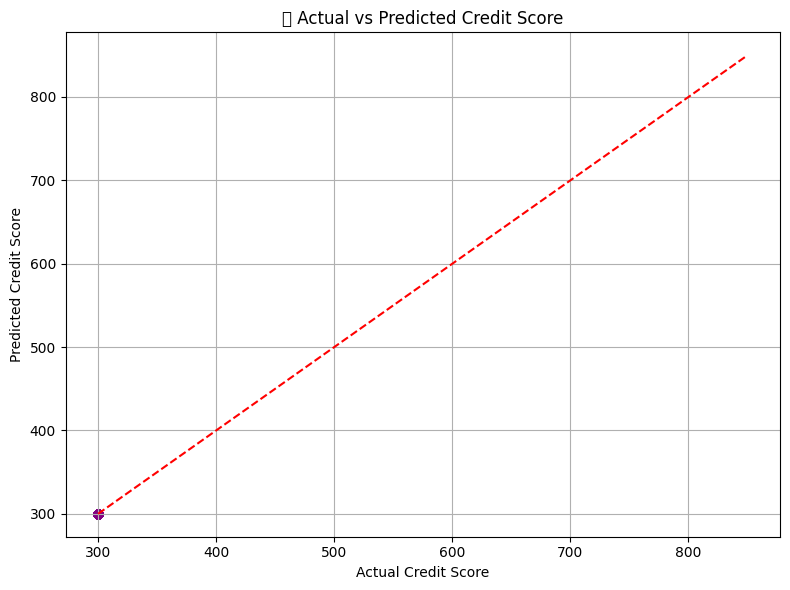

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Feature Distributions
data.drop('credit_score', axis=1).hist(figsize=(12, 8), bins=20)
plt.suptitle("📊 Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("🔥 Correlation Heatmap")
plt.show()

# 3. Actual vs Predicted Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Credit Score")
plt.ylabel("Predicted Credit Score")
plt.title("🎯 Actual vs Predicted Credit Score")
plt.plot([300, 850], [300, 850], 'r--')  # Line of perfect prediction
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
!pip install streamlit
import streamlit as st
import numpy as np
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Save the model if it hasn't been saved already
import os
if not os.path.exists('credit_score_model.pkl'):
    joblib.dump(model, 'credit_score_model.pkl')

# Load your trained model
model = joblib.load('credit_score_model.pkl')

# Streamlit UI
st.title("Credit Score Prediction App")

# User input form for feature values (adjust this for the features in your dataset)
payment_history = st.slider("Payment History (%)", 50, 100, 75) # Changed feature name to match trained model
credit_utilization = st.slider("Credit Utilization (%)", 10, 90, 40) # Changed feature name to match trained model
income = st.number_input("Annual Income", min_value=20000, max_value=150000, value=50000)
loan_count = st.number_input("Number of Loans", min_value=1, max_value=10, value=3) # Changed feature name to match trained model
credit_age = st.number_input("Credit Age (years)", min_value=1, max_value=25, value=5) # Changed feature name to match trained model
debt_to_income = st.slider("Debt-to-Income Ratio", 10, 90, 30) # Changed feature name to match trained model


# Create a dataframe from user inputs
# Feature names should exactly match those used during training
user_input = pd.DataFrame({
    'payment_history': [payment_history],
    'credit_utilization': [credit_utilization],
    'income': [income],
    'loan_count': [loan_count],
    'credit_age': [credit_age],
    'debt_to_income': [debt_to_income / 100]  # Assuming the slider value is a percentage
})

# Predict the credit score using the model
prediction = model.predict(user_input)

# Display the prediction
st.write(f"Predicted Credit Score: {prediction[0]:.2f}")

# Optionally, show more details about the model or insights
st.subheader("Model Insights:")
st.write("This model uses various features like age, income, loan amount, and duration to predict your credit score.")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 107.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.6 MB/s eta 0:00:00


2025-05-03 05:21:47.927 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:48.135 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-05-03 05:21:48.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:48.137 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:48.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:48.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:48.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:48.143 Thread 'MainThread': mi

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load your trained model
model = joblib.load('credit_score_model.pkl')

# Streamlit UI
st.title("Credit Score Prediction App")

# Option to upload a CSV file
uploaded_file = st.file_uploader("Upload a CSV file for batch predictions", type="csv")

# User input form for single prediction
st.subheader("Enter details for a single prediction:")
age = st.slider("Age", 18, 100, 30)
income = st.number_input("Annual Income", min_value=10000, max_value=1000000, value=50000)
loan_amount = st.number_input("Loan Amount", min_value=1000, max_value=1000000, value=20000)
loan_duration = st.number_input("Loan Duration (in years)", min_value=1, max_value=30, value=10)
other_feature = st.number_input("Other Feature", value=0)

# Create a dataframe from user inputs
user_input = pd.DataFrame({
    'age': [age],
    'income': [income],
    'loan_amount': [loan_amount],
    'loan_duration': [loan_duration],
    'other_feature': [other_feature]
})

# Make predictions
if uploaded_file is not None:
    try:
        df = pd.read_csv(uploaded_file)
        predictions = model.predict(df)
        st.subheader("Batch Predictions from CSV:")
        st.dataframe(pd.DataFrame({'Predicted Credit Score': predictions}))  # Display as DataFrame
    except Exception as e:
        st.error(f"Error reading CSV file: {e}")

# Predict and display for single input
if st.button("Predict Credit Score"): # Add a button to trigger single prediction
    prediction = model.predict(user_input)
    st.subheader("Single Prediction:")
    st.write(f"Predicted Credit Score: {prediction[0]:.2f}")

# Optionally, show more details about the model or insights
st.subheader("Model Insights:")
st.write("This model uses various features like age, income, loan amount, and duration to predict your credit score.")


2025-05-03 05:21:50.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:50.220 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:50.223 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:50.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:50.226 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:50.227 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:50.228 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:50.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import streamlit as st

# Streamlit UI
st.title("My First Streamlit App")

st.header("Welcome to Streamlit!")
st.write(
    "This is a basic Streamlit app. You can add more elements here to build your UI."
)

# Add a text input
name = st.text_input("Enter your name:", "Streamlit User")
st.write(f"Hello, {name}!")

# Add a slider
age = st.slider("How old are you?", 0, 130, 25)
st.write("I'm ", age, "years old")

# Add a select box
favorite_color = st.selectbox(
    "What is your favorite color?", ("Blue", "Green", "Red", "Other")
)
st.write("Your favorite color is", favorite_color)

# Add a radio button
gender = st.radio("What is your gender?", ("Male", "Female", "Other"))
st.write("Your gender is", gender)

# Add a checkbox
wants_email = st.checkbox("Do you want to receive our newsletter?")
if wants_email:
    st.write("Great! You will receive our newsletter.")
else:
    st.write("Okay, you will not receive our newsletter.")

# Add a multiselect
options = st.multiselect(
    "What fruits do you like?", ["Apple", "Banana", "Cherry", "Date"]
)
st.write("You selected:", options)

# Add a button
if st.button("Click me"):
    st.write("Thanks for clicking!")

# Add a text area
story = st.text_area("Tell us a story:", "It was a dark and stormy night...")
st.write("Your story:", story)


2025-05-03 05:21:57.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:57.320 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:57.323 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:57.326 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:57.329 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:57.331 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:57.334 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:21:57.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
import streamlit as st
import pandas as pd
import numpy as np

# Sample model (replace with your actual model loading and prediction)
def predict_credit_score(age, income, loan_amount, loan_duration):
    """
    This is a placeholder for your actual model prediction function.
    Replace this with your model's logic.  For example,
    if you have a trained sklearn model:
    model = joblib.load('your_model.pkl')  # Load your model
    #  Make sure the order of features matches the training data
    input_data = pd.DataFrame({'age': [age], 'income': [income], 'loan_amount': [loan_amount], 'loan_duration': [loan_duration]})
    prediction = model.predict(input_data)[0] # get the prediction
    return prediction

    """
    # Placeholder:  A simple linear function for demonstration
    score = 100 - (age * 0.5) + (income * 0.005) - (loan_amount * 0.001) - (loan_duration * 2)
    return max(300, min(850, int(score + np.random.normal(0, 10)))) # Simulate some noise and constrain to a reasonable range


# Streamlit UI
st.title("Credit Score Prediction App")

st.header("Enter Your Details")

# User input form
age = st.slider("Age", 18, 100, 30)
income = st.number_input("Annual Income", min_value=10000, max_value=1000000, value=50000)
loan_amount = st.number_input("Loan Amount", min_value=1000, max_value=1000000, value=20000)
loan_duration = st.number_input("Loan Duration (in years)", min_value=1, max_value=30, value=10)

# Predict and display
if st.button("Predict Credit Score"):
    prediction = predict_credit_score(age, income, loan_amount, loan_duration)
    st.subheader("Predicted Credit Score:")
    st.write(f"Your predicted credit score is: {prediction}")
    st.write("Disclaimer: This is a simplified prediction for demonstration purposes only.")


2025-05-03 05:22:00.493 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:22:00.495 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:22:00.497 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:22:00.499 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:22:00.501 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:22:00.503 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:22:00.504 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-03 05:22:00.505 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar